<div style="background-color: #3D26B5;font-weight:bold;font-family:calibri;font-size:20px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
1 - Importação de bibliotecas
</div>

In [1]:
# Retirar as aspas triplas para instalar as bibliotecas necessárias, se não instaladas anteriormente
'''!pip install pydotplus
!pip install dtreeviz'''

'!pip install pydotplus\n!pip install dtreeviz'

In [82]:
import pandas as pd
import numpy as np
import pydotplus
from IPython.display import Image
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from dtreeviz.trees import *

<div style="background-color: #3D26B5;font-weight:bold;font-family:calibri;font-size:20px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
2 - Carga dos dados e particionamento das bases de treinamento e teste
</div>

In [85]:
aceitacoes = pd.read_excel('DATASET_PARA_CLASSIFICACAO.xlsx', sheet_name=0) 
print("\nDimensões: {0}".format(aceitacoes.shape))
print("\nCampos: {0}".format(aceitacoes.keys()))


aceit_format = aceitacoes.astype(str)
print(aceit_format.describe(), sep='\n')

le = LabelEncoder()
X_dict = aceit_format.iloc[:,0:(aceit_format.shape[1] - 1)].T.to_dict().values()
vect = DictVectorizer(sparse=False)
X = vect.fit_transform(X_dict)

y = le.fit_transform(aceit_format.iloc[:,(aceit_format.shape[1] - 1)])


# Particiona a base de dados utilizando 25% para teste e 75% para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# Exibe o dado convertido em dicionario.
print("Atributos:", X_dict)

# Exibe a estrutura do dado convertido em binário.
print("Shape do dado de treinamento: {0}".format(X_train.shape))

print("Labels:", y_train)




Dimensões: (1009, 4)

Campos: Index(['causa_distorcao', 'responsavel_tratamento', 'ca_nivel3', 'aceitacao'], dtype='object')
                                    causa_distorcao responsavel_tratamento  \
count                                          1009                   1009   
unique                                           38                     11   
top     RD - Compensação (DCOMP ou  Previdenciária)                  X-ort   
freq                                            270                    221   

       ca_nivel3 aceitacao  
count       1009      1009  
unique        11         2  
top          622       Não  
freq         305       528  
Atributos: dict_values([{'causa_distorcao': 'RD - Compensação (DCOMP ou  Previdenciária)', 'responsavel_tratamento': 'Gabinete da DRF', 'ca_nivel3': '580'}, {'causa_distorcao': 'RD - Compensação (DCOMP ou  Previdenciária)', 'responsavel_tratamento': 'Gabinete da DRF', 'ca_nivel3': '140'}, {'causa_distorcao': 'RD - Compensação (DCOMP ou 

<div style="background-color: #3D26B5;font-weight:bold;font-family:calibri;font-size:20px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
3 - Modelos de Machine Learning
</div>

<div style="background-color: #33C9FF;font-weight:bold;font-family:calibri;font-size:18px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
3.1 - Decision Tree Classifier (Árvore de Decisão)
</div>

In [86]:
# Melhor avaliado
aceit_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth = 7, min_samples_leaf = 9)
aceit_tree = aceit_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", aceit_tree.score(X_train, y_train))

print('='*60)

print('       Acurácia de Previsão e Classification Report\n')
y_pred = aceit_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Sim", "Não"]))

print('='*60)

print('      Matriz de Confusão\n')
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Sim", "Não"], columns=["Sim (prev)", "Não (prev)"])
print(cnf_table)



Acurácia (base de treinamento): 0.6878306878306878
       Acurácia de Previsão e Classification Report

Acurácia de previsão: 0.6996047430830039
              precision    recall  f1-score   support

         Sim       0.75      0.61      0.67       127
         Não       0.67      0.79      0.72       126

    accuracy                           0.70       253
   macro avg       0.71      0.70      0.70       253
weighted avg       0.71      0.70      0.70       253

      Matriz de Confusão

     Sim (prev)  Não (prev)
Sim          77          50
Não          26         100


In [94]:
scores_tree = cross_val_score(aceit_tree, X_train, y_train, scoring='accuracy', cv=4)
print('Acurácia por Cross Validation\n')
print(scores_tree.mean())

Acurácia por Cross Validation

0.6547619047619048


<div style="background-color: #33C9FF;font-weight:bold;font-family:calibri;font-size:18px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
3.2 - Random Forest
</div>

In [48]:
aceit_forest = RandomForestClassifier(random_state = 42, criterion='gini', max_depth = 7, min_samples_leaf = 9, n_estimators=17, n_jobs=-1)
aceit_forest = aceit_forest.fit(X_train, y_train)
print("Acurácia (base de treinamento):", aceit_forest.score(X_train, y_train))

print('='*60)

print('       Acurácia de Previsão e Classification Report\n')
y_pred = aceit_forest.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Sim", "Não"]))

print('='*60)

print('      Matriz de Confusão\n')
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Sim", "Não"], columns=["Sim (prev)", "Não (prev)"])
print(cnf_table)

Acurácia (base de treinamento): 0.667989417989418
       Acurácia de Previsão e Classification Report

Acurácia de previsão: 0.6837944664031621
              precision    recall  f1-score   support

         Sim       0.68      0.71      0.69       127
         Não       0.69      0.66      0.67       126

    accuracy                           0.68       253
   macro avg       0.68      0.68      0.68       253
weighted avg       0.68      0.68      0.68       253

      Matriz de Confusão

     Sim (prev)  Não (prev)
Sim          90          37
Não          43          83


In [49]:
scores_forest = cross_val_score(aceit_forest, X_train, y_train, scoring='accuracy', cv=4)
print('Acurácia por Cross Validation\n')
print(scores_forest.mean())

Acurácia por Cross Validation

0.6349206349206349


<div style="background-color: #33C9FF;font-weight:bold;font-family:calibri;font-size:18px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
3.3 - Adaboost
</div>

In [75]:
aceit_adab = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth = 7, min_samples_leaf = 9), n_estimators=10, random_state=42, algorithm='SAMME')
aceit_adab = aceit_adab.fit(X_train, y_train)
print("Acurácia (base de treinamento):", aceit_adab.score(X_train, y_train))

print('='*60)

print('       Acurácia de Previsão e Classification Report\n')
y_pred = aceit_adab.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Sim", "Não"]))

print('='*60)

print('      Matriz de Confusão\n')      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Sim", "Não"], columns=["Sim (prev)", "Não (prev)"])
print(cnf_table)

Acurácia (base de treinamento): 0.7341269841269841
       Acurácia de Previsão e Classification Report

Acurácia de previsão: 0.6877470355731226
              precision    recall  f1-score   support

         Sim       0.68      0.72      0.70       127
         Não       0.70      0.65      0.67       126

    accuracy                           0.69       253
   macro avg       0.69      0.69      0.69       253
weighted avg       0.69      0.69      0.69       253

      Matriz de Confusão

     Sim (prev)  Não (prev)
Sim          92          35
Não          44          82


In [56]:
scores_adab = cross_val_score(aceit_adab, X_train, y_train, scoring='accuracy', cv=4)
print('Acurácia por Cross Validation\n')
print(scores_adab.mean())

Acurácia por Cross Validation

0.6402116402116402


<div style="background-color: #33C9FF;font-weight:bold;font-family:calibri;font-size:18px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
3.4 - Nayve Bayes
</div>

In [80]:
aceit_gnb = GaussianNB()
aceit_gnb = aceit_gnb.fit(X_train, y_train)
print("Acurácia (base de treinamento):", aceit_gnb.score(X_train, y_train))

print('='*60)

print('       Acurácia de Previsão e Classification Report\n')
y_pred = aceit_gnb.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Sim", "Não"]))

print('='*60)

print('      Matriz de Confusão\n')      
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=["Sim", "Não"], columns=["Sim (prev)", "Não (prev)"])
print(cnf_table)

Acurácia (base de treinamento): 0.5912698412698413
       Acurácia de Previsão e Classification Report

Acurácia de previsão: 0.541501976284585
              precision    recall  f1-score   support

         Sim       0.53      0.88      0.66       127
         Não       0.62      0.20      0.30       126

    accuracy                           0.54       253
   macro avg       0.58      0.54      0.48       253
weighted avg       0.58      0.54      0.48       253

      Matriz de Confusão

     Sim (prev)  Não (prev)
Sim         112          15
Não         101          25


In [81]:
scores_nb = cross_val_score(aceit_gnb, X_train, y_train, scoring='accuracy', cv=4)
print('Acurácia por Cross Validation\n')
print(scores_nb.mean())

Acurácia por Cross Validation

0.5621693121693121


<div style="background-color: #3D26B5;font-weight:bold;font-family:calibri;font-size:20px;color:white;padding:10px;line-height:1;text-align:left;border-radius: 10px;">
<p style="margin-left: 10px;">
4 - Exibição da árvore de decisão
</div>

In [12]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+r"C:\Users\Daniel\Anaconda3\Library\bin\graphviz"

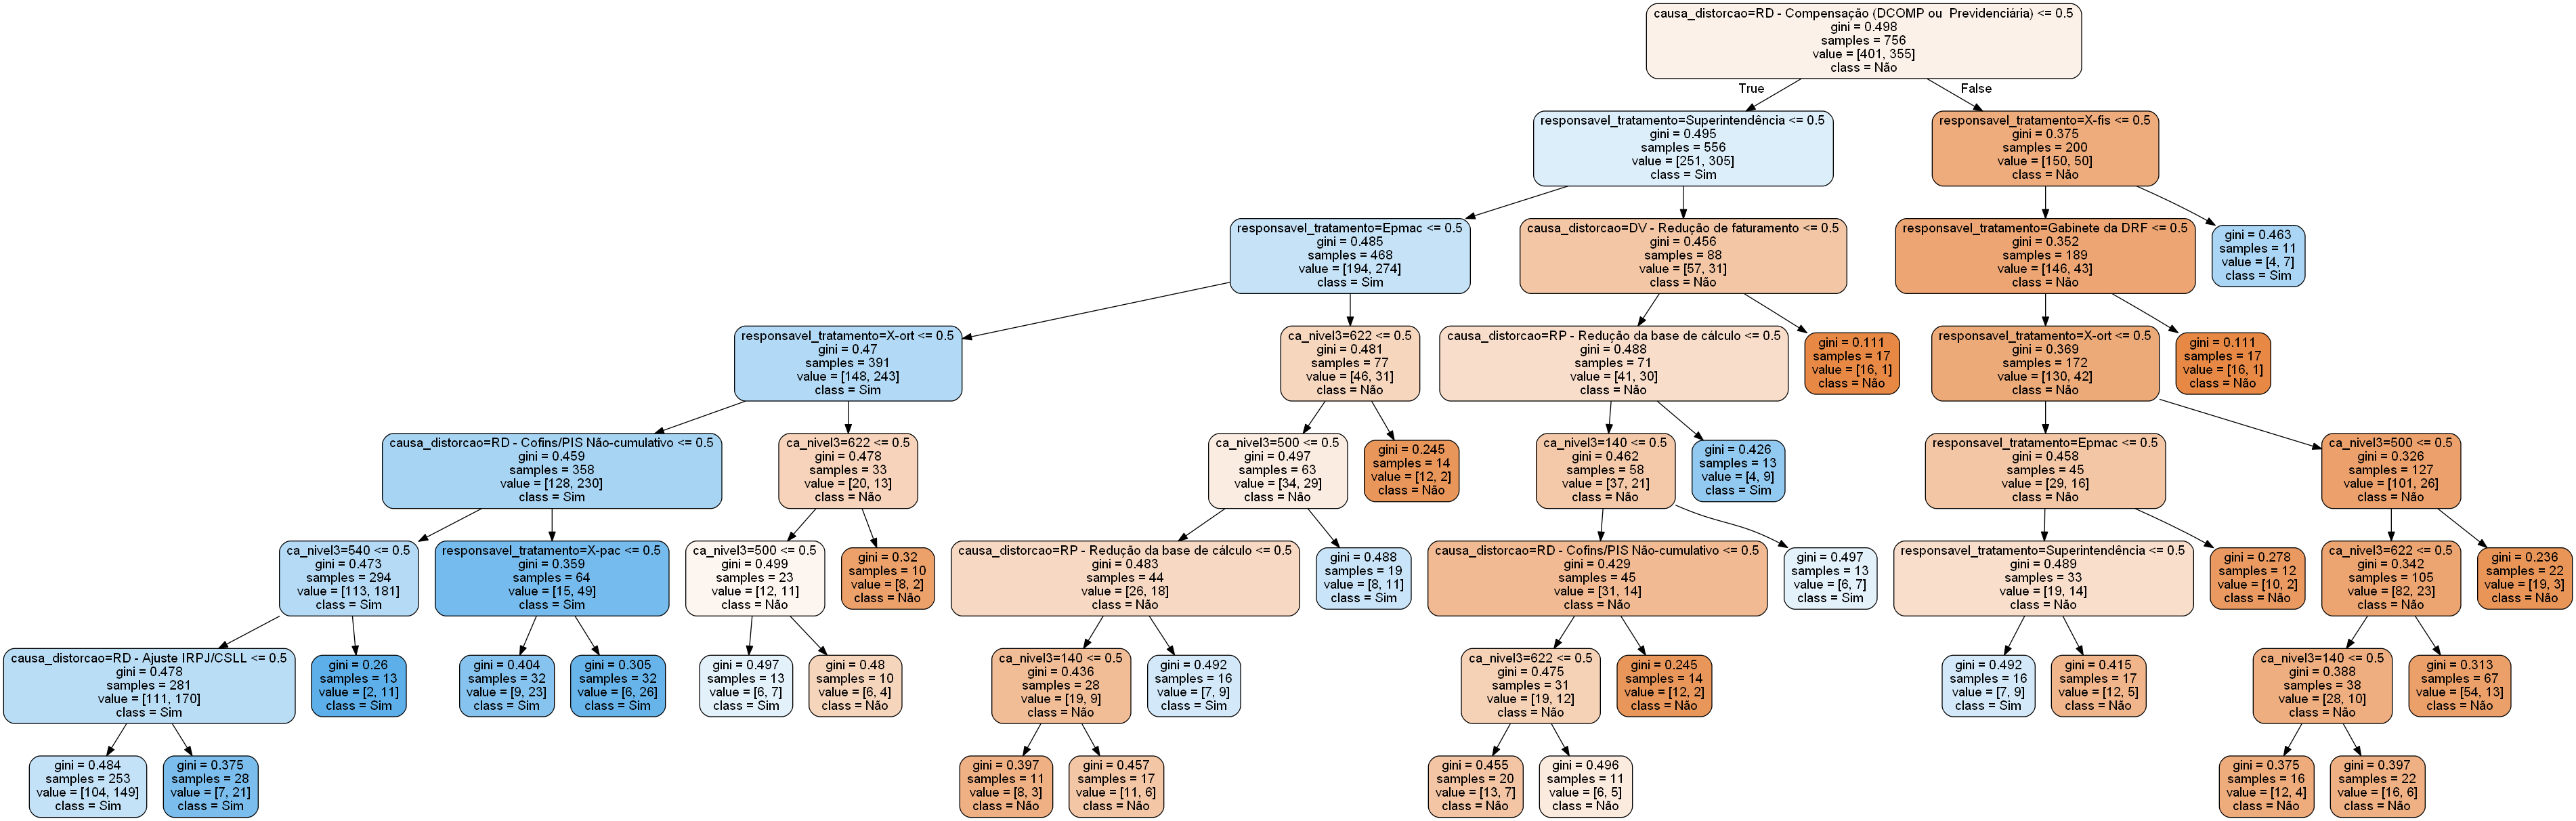

In [13]:
# Create DOT data
dot_data = tree.export_graphviz(aceit_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True,
                                feature_names=vect.feature_names_,  
                                class_names=["Não", "Sim"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [14]:
viz = dtreeviz(aceit_tree,
              X_train,
              y_train,
              target_name="Aceitacao",
              feature_names = vect.feature_names_,
              class_names = ["Sim", "Não"])

viz.view()